In [1]:
from sentence_transformers import SentenceTransformer # type: ignore
import pandas as pd

c:\Users\mrakj\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Read the CSV file
df = pd.read_csv('../../data/new_data.csv')

# Extract all messages from the "Message" column
data = df['Message'].tolist()
ground_truth = df['R2DiscussionType'].tolist()

# Print all messages
print(ground_truth)



['Social', 'Seminar', 'Seminar', 'Seminar', 'Seminar', 'Seminar', 'Seminar', 'Seminar', 'Procedure', 'Seminar', 'Seminar', 'Seminar', 'Seminar', 'Other', 'Seminar', 'Seminar', 'Seminar', 'Seminar', 'Seminar', 'Seminar', 'Seminar', 'Seminar', 'Seminar', 'Seminar', 'Seminar', 'Seminar', 'Seminar', 'Seminar', 'Seminar', 'Seminar', 'Seminar', 'Seminar', 'Seminar', 'Seminar', 'Seminar', 'Seminar', 'Seminar', 'Seminar', 'Seminar', 'Deliberation', 'UX', 'Deliberation', 'Deliberation', 'Deliberation', 'UX', 'Deliberation', 'Deliberation', 'Social', 'Social', 'Procedure', 'Social', 'Procedure', 'Procedure', 'Procedure', 'Seminar', 'Seminar', 'Seminar', 'Seminar', 'Seminar', 'Other', 'Seminar', 'Seminar', 'Seminar', 'Seminar', 'Seminar', 'Seminar', 'Seminar', 'Seminar', 'Seminar', 'Seminar', 'Seminar', 'Seminar', 'Other', 'Seminar', 'Seminar', 'Seminar', 'Seminar', 'Other', 'Seminar', 'Seminar', 'Imaginative entry', 'Seminar', 'Seminar', 'Seminar', 'Seminar', 'Other', 'Seminar', 'Seminar', 'Semi

In [4]:
# count possible classes in the ground truth (R2DiscussionType)
classes = set(ground_truth)
print(classes)

# count number of messages in each class
class_count = {}
for c in classes:
    class_count[c] = ground_truth.count(c)
print(class_count)



{'Social', 'Other', 'UX', 'Seminar', 'Deliberation', 'Deliberation, Seminar', 'Social, Procedure', 'Social, Deliberation', 'Seminar, Deliberation', 'Imaginative', 'Procedure', 'Imaginative entry'}
{'Social': 69, 'Other': 6, 'UX': 47, 'Seminar': 333, 'Deliberation': 85, 'Deliberation, Seminar': 1, 'Social, Procedure': 1, 'Social, Deliberation': 1, 'Seminar, Deliberation': 2, 'Imaginative': 2, 'Procedure': 46, 'Imaginative entry': 18}


In [5]:
# sentences = ["This is an example sentence", "Each sentence is converted"]

model_miniLML6V2 = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')
model_mpnetBaseV2 = SentenceTransformer('sentence-transformers/all-mpnet-base-v2')
model_mpnetRetrieverDiscourse = SentenceTransformer('pinecone/mpnet-retriever-discourse')

# data = data[:600]
embeddings_miniLML6V = model_miniLML6V2.encode(data)
embeddings_mpnetBaseV2 = model_mpnetBaseV2.encode(data)
embeddings_mpnetRetrieverDiscourse = model_mpnetRetrieverDiscourse.encode(data)


#print(embeddings_miniLML6V[0])
#print(len(embeddings_miniLML6V[0]))

#print(embeddings_mpnetBaseV2[0])
#print(len(embeddings_mpnetBaseV2[0]))

print(embeddings_mpnetRetrieverDiscourse[0])
print(len(embeddings_mpnetRetrieverDiscourse[0]))

[-5.71111321e-01 -2.59731084e-01  4.26333517e-01 -2.23927721e-01
  2.50088751e-01 -5.00244498e-01 -6.61724210e-02  4.51435179e-01
 -2.36536413e-01 -2.34496668e-01 -4.48713601e-01 -6.54275566e-02
  2.40040272e-01 -2.48262987e-01 -6.01980686e-01 -4.32021856e-01
 -2.46931344e-01 -7.90883601e-03 -4.00711112e-02  2.77410448e-01
 -2.51452774e-01 -5.66762313e-02 -2.63448685e-01 -3.06699991e-01
  1.61845848e-01  4.99072075e-02 -5.86389422e-01  1.76466510e-01
 -8.37482572e-01 -3.61934483e-01 -5.57997108e-01 -2.82188088e-01
  3.98202211e-01  8.40896815e-02 -7.18451381e-01 -1.75593525e-01
 -1.85293674e-01  5.30839145e-01 -5.19178987e-01  1.30296201e-01
  2.40056306e-01 -4.83576208e-04  4.38158154e-01  1.20738214e-02
 -7.81064630e-01 -2.86007047e-01 -8.95921171e-01 -9.92019102e-02
  3.31570596e-01 -2.82458514e-02  3.95914316e-02 -4.98736203e-02
 -3.41670334e-01  8.53914097e-02  5.45277238e-01 -4.12981391e-01
  3.13837200e-01 -5.30334353e-01  4.41716984e-03  3.83633673e-01
 -3.87656868e-01 -3.52991

In [6]:
model_MiniLML12v2 = SentenceTransformer('sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2')
embeddings_MiniLML12v2 = model_MiniLML12v2.encode(data)

print(embeddings_MiniLML12v2[0])
print(len(embeddings_MiniLML12v2[0]))

[ 0.2220274   0.11770475  0.34873837  0.266141   -0.23124455 -0.26759008
  0.48517483  0.1630819  -0.18206413  0.28188398  0.1051586  -0.5750994
 -0.09391461 -0.06209369  0.30870435  0.29927057  0.374435   -0.07176708
 -0.20562741 -0.24046075 -0.12702283  0.01556025 -0.06748149  0.16030732
  0.0110493  -0.19657387  0.23265791  0.5778713  -0.03653082 -0.43782094
 -0.1461823  -0.21320055  0.48161897 -0.04153767 -0.07668866  0.39620858
 -0.06846652 -0.1776478  -0.15415214  0.06278209  0.16044293 -0.15322748
  0.09320598  0.2877882   0.00240513 -0.25482628 -0.08643009  0.06812086
  0.30015898  0.16058967  0.09115475 -0.04448625 -0.15808722  0.03280711
  0.12418582  0.3935767  -0.08949676  0.09295697  0.07434413  0.1993901
 -0.11508027  0.10961265 -0.7602018   0.44730788 -0.49992532 -0.12830229
 -0.21151663 -0.04692628 -0.3394928  -0.18981244 -0.13128076 -0.23133329
 -0.06970433  0.21099263 -0.08350609 -0.08567265  0.13969143  0.2725882
  0.04238715  0.00632367  0.24680725  0.13664053 -0.11

In [88]:
# clustering
from sklearn.cluster import KMeans 

n_clusters = 6  # we removed others since there is little data for it

# kmeans = KMeans(n_clusters=5, random_state=0, n_init="auto").fit(embeddings)
kmeans_miniLML6V = KMeans(n_clusters=n_clusters)
cluster_labels_miniLML6V = kmeans_miniLML6V.fit_predict(embeddings_miniLML6V)

kmeans_mpnetBaseV2 = KMeans(n_clusters=n_clusters)
cluster_labels_mpnetBaseV2 = kmeans_mpnetBaseV2.fit_predict(embeddings_mpnetBaseV2)

kmeans_mpnetRetrieverDiscourse = KMeans(n_clusters=n_clusters)
cluster_labels_mpnetRetrieverDiscourse = kmeans_mpnetRetrieverDiscourse.fit_predict(embeddings_mpnetRetrieverDiscourse)

kmeans_MiniLML12v2 = KMeans(n_clusters=n_clusters)
cluster_labels_MiniLML12v2 = kmeans_MiniLML12v2.fit_predict(embeddings_MiniLML12v2)


# clusters = kmeans.predict(embeddings)


c:\Users\mrakj\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\mrakj\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\mrakj\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\mrakj\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\clus

[t-SNE] Computing 46 nearest neighbors...
[t-SNE] Indexed 611 samples in 0.001s...
[t-SNE] Computed neighbors for 611 samples in 0.029s...
[t-SNE] Computed conditional probabilities for sample 611 / 611
[t-SNE] Mean sigma: 0.305670
[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.445679
[t-SNE] KL divergence after 600 iterations: 1.111345
[t-SNE] Computing 46 nearest neighbors...
[t-SNE] Indexed 611 samples in 0.001s...
[t-SNE] Computed neighbors for 611 samples in 0.044s...
[t-SNE] Computed conditional probabilities for sample 611 / 611
[t-SNE] Mean sigma: 0.309656
[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.301712
[t-SNE] KL divergence after 600 iterations: 1.100863
[t-SNE] Computing 46 nearest neighbors...
[t-SNE] Indexed 611 samples in 0.002s...
[t-SNE] Computed neighbors for 611 samples in 0.037s...
[t-SNE] Computed conditional probabilities for sample 611 / 611
[t-SNE] Mean sigma: 3.178266
[t-SNE] KL divergence after 250 iterations

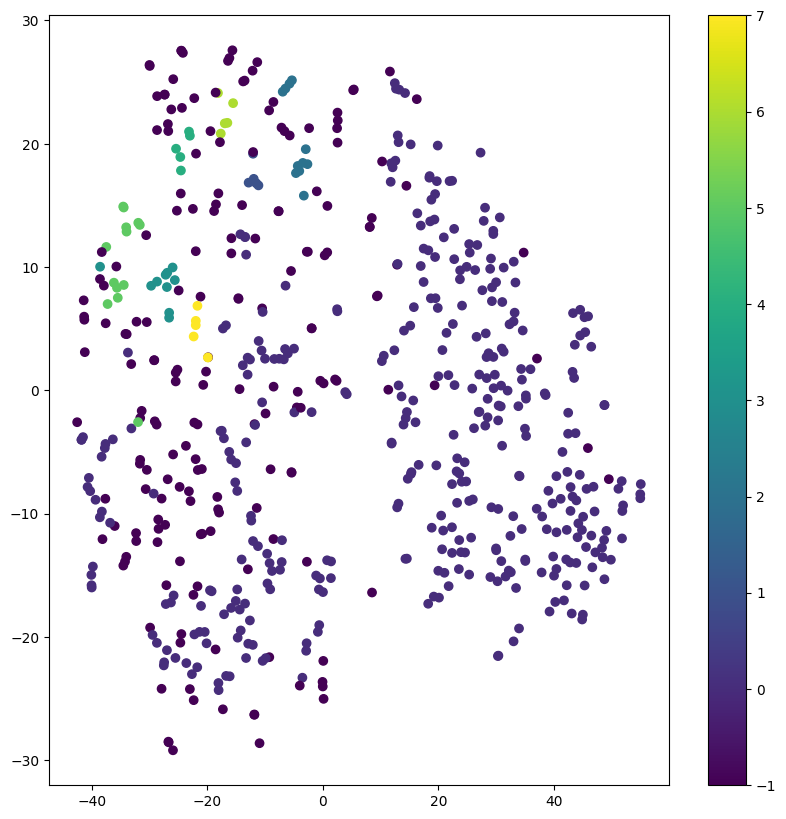

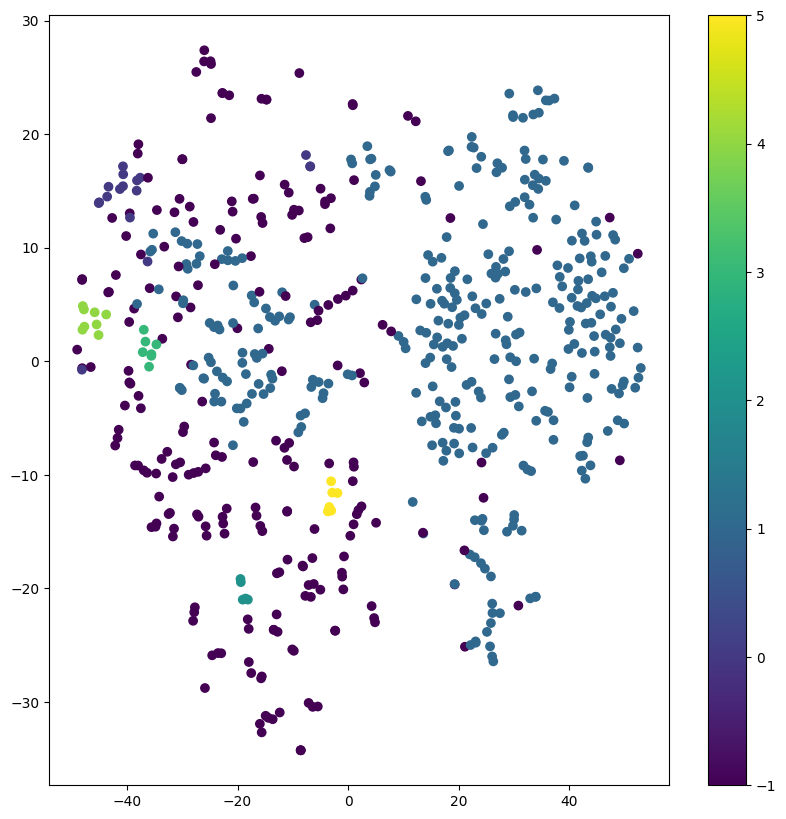

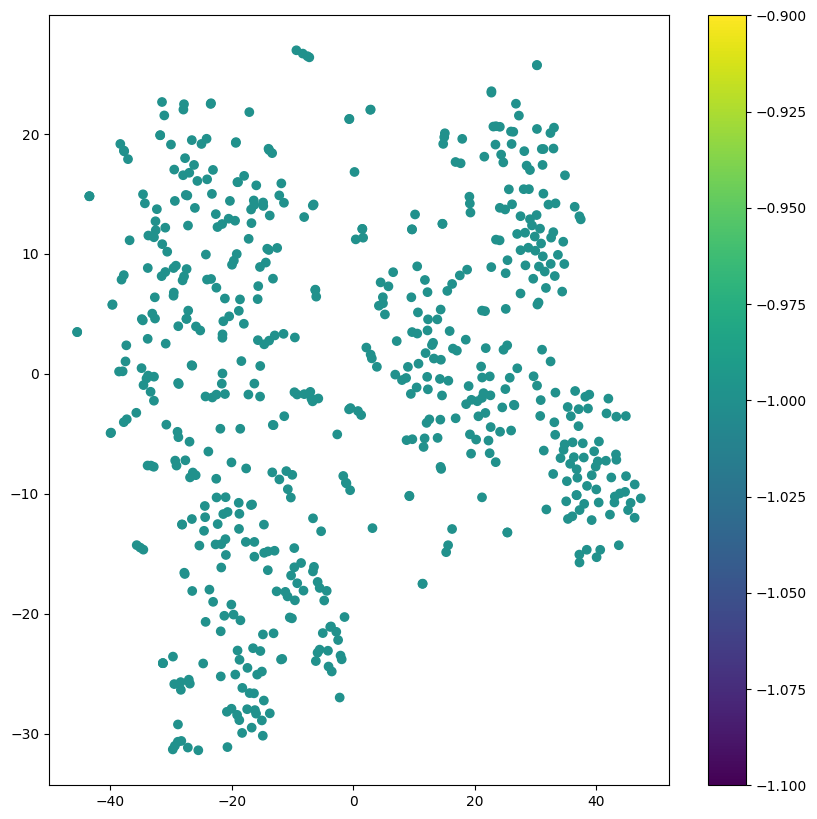

9
7
1


In [42]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Define eps (epsilon) - search radius for neighbors
eps = 1.01 # (choose an appropriate value based on your data)

# Define min_samples (MinPts) - minimum number of neighbors for a core point
min_samples = 5 # (choose an appropriate value based on your data)

# Create a DBSCAN instance
dbscan = DBSCAN(eps=eps, min_samples=min_samples)

# Fit the DBSCAN model to the embeddings
cluster_labels_miniLML6V_DBSCAN = dbscan.fit_predict(embeddings_miniLML6V)
cluster_labels_mpnetBaseV2_DBSCAN = dbscan.fit_predict(embeddings_mpnetBaseV2)
cluster_labels_mpnetRetrieverDiscourse_DBSCAN = dbscan.fit_predict(embeddings_mpnetRetrieverDiscourse)


tsne = TSNE(n_components=2, verbose=1, perplexity=15, n_iter=600)
embedded_tsne_miniLML6V_DBSCAN = tsne.fit_transform(embeddings_miniLML6V)
embedded_tsne_mpnetBaseV2_DBSCAN = tsne.fit_transform(embeddings_mpnetBaseV2)
embedded_tsne_mpnetRetrieverDiscourse_DBSCAN = tsne.fit_transform(embeddings_mpnetRetrieverDiscourse)



# plot the clusters for miniLML6V
plt.figure(figsize=(10, 10))
plt.scatter(embedded_tsne_miniLML6V_DBSCAN[:, 0], embedded_tsne_miniLML6V_DBSCAN[:, 1], c=cluster_labels_miniLML6V_DBSCAN, cmap='viridis')
plt.colorbar()
plt.show()

# plot the clusters for mpnetBaseV2
plt.figure(figsize=(10, 10))
plt.scatter(embedded_tsne_mpnetBaseV2_DBSCAN[:, 0], embedded_tsne_mpnetBaseV2_DBSCAN[:, 1], c=cluster_labels_mpnetBaseV2_DBSCAN, cmap='viridis')
plt.colorbar()
plt.show()

# plot the clusters for mpnetRetrieverDiscourse
plt.figure(figsize=(10, 10))
plt.scatter(embedded_tsne_mpnetRetrieverDiscourse_DBSCAN[:, 0], embedded_tsne_mpnetRetrieverDiscourse_DBSCAN[:, 1], c=cluster_labels_mpnetRetrieverDiscourse_DBSCAN, cmap='viridis')
plt.colorbar()
plt.show()


# Output each cluster in embedded_tsne_miniLML6V_DBSCAN to a separate CSV file with the corresponding ground truth label
num_clusters = len(set(cluster_labels_miniLML6V_DBSCAN))
print(num_clusters)

cluster_classes = set(cluster_labels_miniLML6V_DBSCAN)
for cluster_class in cluster_classes:
    cluster = embedded_tsne_miniLML6V_DBSCAN[cluster_labels_miniLML6V_DBSCAN == cluster_class]
    ground_truth_cluster = [ground_truth[j] for j in range(len(cluster_labels_miniLML6V_DBSCAN)) if cluster_labels_miniLML6V_DBSCAN[j] == cluster_class]
    df_cluster = pd.DataFrame(cluster, columns=['x', 'y'])
    df_cluster['ground_truth'] = ground_truth_cluster
    df_cluster.to_csv(f'./DBSCAN/cluster_{cluster_class}.csv', index=False)

# clear the file
open('./DBSCAN/cluster_class_percentage.txt', 'w').close()

# calculate the percentage of each class in each cluster in DBSCAN/cluster_{i}.csv
for cluster_class in cluster_classes:
    df_cluster = pd.read_csv(f'./DBSCAN/cluster_{cluster_class}.csv')
    class_count = df_cluster['ground_truth'].value_counts()
    total = class_count.sum()
    class_percentage = class_count / total
    with open(f'./DBSCAN/cluster_class_percentage.txt', 'a') as f:
        f.write(f'Cluster {cluster_class}:\n')
        f.write(f'{class_percentage}\n\n')


# Output each cluster in embedded_tsne_mpnetBaseV2_DBSCAN to a separate CSV file with the corresponding ground truth label
num_clusters = len(set(cluster_labels_mpnetBaseV2_DBSCAN))
print(num_clusters)

cluster_classes = set(cluster_labels_mpnetBaseV2_DBSCAN)
for cluster_class in cluster_classes:
    cluster = embedded_tsne_mpnetBaseV2_DBSCAN[cluster_labels_mpnetBaseV2_DBSCAN == cluster_class]
    ground_truth_cluster = [ground_truth[j] for j in range(len(cluster_labels_mpnetBaseV2_DBSCAN)) if cluster_labels_mpnetBaseV2_DBSCAN[j] == cluster_class]
    df_cluster = pd.DataFrame(cluster, columns=['x', 'y'])
    df_cluster['ground_truth'] = ground_truth_cluster
    df_cluster.to_csv(f'./DBSCAN/cluster_mpnetBaseV2_{cluster_class}.csv', index=False)

# clear the file
open('./DBSCAN/cluster_class_percentage_mpnetBaseV2.txt', 'w').close()

# calculate the percentage of each class in each cluster in DBSCAN/cluster_{i}.csv
for cluster_class in cluster_classes:
    df_cluster = pd.read_csv(f'./DBSCAN/cluster_mpnetBaseV2_{cluster_class}.csv')
    class_count = df_cluster['ground_truth'].value_counts()
    total = class_count.sum()
    class_percentage = class_count / total
    with open(f'./DBSCAN/cluster_class_percentage_mpnetBaseV2.txt', 'a') as f:
        f.write(f'Cluster {cluster_class}:\n')
        f.write(f'{class_percentage}\n\n')

# Output each cluster in embedded_tsne_mpnetRetrieverDiscourse_DBSCAN to a separate CSV file with the corresponding ground truth label
num_clusters = len(set(cluster_labels_mpnetRetrieverDiscourse_DBSCAN))
print(num_clusters)

cluster_classes = set(cluster_labels_mpnetRetrieverDiscourse_DBSCAN)
for cluster_class in cluster_classes:
    cluster = embedded_tsne_mpnetRetrieverDiscourse_DBSCAN[cluster_labels_mpnetRetrieverDiscourse_DBSCAN == cluster_class]
    ground_truth_cluster = [ground_truth[j] for j in range(len(cluster_labels_mpnetRetrieverDiscourse_DBSCAN)) if cluster_labels_mpnetRetrieverDiscourse_DBSCAN[j] == cluster_class]
    df_cluster = pd.DataFrame(cluster, columns=['x', 'y'])
    df_cluster['ground_truth'] = ground_truth_cluster
    df_cluster.to_csv(f'./DBSCAN/cluster_mpnetRetrieverDiscourse_{cluster_class}.csv', index=False)

# clear the file
open('./DBSCAN/cluster_class_percentage_mpnetRetrieverDiscourse.txt', 'w').close()

# calculate the percentage of each class in each cluster in DBSCAN/cluster_{i}.csv
for cluster_class in cluster_classes:
    df_cluster = pd.read_csv(f'./DBSCAN/cluster_mpnetRetrieverDiscourse_{cluster_class}.csv')
    class_count = df_cluster['ground_truth'].value_counts()
    total = class_count.sum()
    class_percentage = class_count / total
    with open(f'./DBSCAN/cluster_class_percentage_mpnetRetrieverDiscourse.txt', 'a') as f:
        f.write(f'Cluster {cluster_class}:\n')
        f.write(f'{class_percentage}\n\n')


In [86]:
# Hiararchical clustering
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Sample data (replace with your embeddings)
X = embeddings_miniLML6V
X_mpnetBaseV2 = embeddings_mpnetBaseV2
X_mpnetRetrieverDiscourse = embeddings_mpnetRetrieverDiscourse


# Define linkage method (e.g., 'ward' for minimizing variance)
linkage_method = 'ward'
linkage_method = 'average'
linkage_method = 'complete'

# Create an AgglomerativeClustering object
# n_clusters: desired number of clusters (optional)
# distance_threshold: distance threshold to stop merging (optional)
model = AgglomerativeClustering(n_clusters=6, linkage=linkage_method)

# Fit the model to the data
model.fit(X)

# Get cluster labels for each data point
cluster_labels = model.labels_

# Optional: Visualize the clustering structure using a dendrogram
# dendrogram(linkage(X, method=linkage_method))
# plt.show()

# Output each cluster in embedded_tsne_miniLML6V_DBSCAN to a separate CSV file with the corresponding ground truth label
num_clusters = len(set(cluster_labels))
print(num_clusters)

cluster_classes = set(cluster_labels)
for cluster_class in cluster_classes:
    cluster = embedded_tsne_miniLML6V_DBSCAN[cluster_labels == cluster_class]
    ground_truth_cluster = [ground_truth[j] for j in range(len(cluster_labels)) if cluster_labels[j] == cluster_class]
    df_cluster = pd.DataFrame(cluster, columns=['x', 'y'])
    df_cluster['ground_truth'] = ground_truth_cluster
    df_cluster.to_csv(f'./Hiararchical/cluster_{cluster_class}.csv', index=False)

# clear the file
open('./Hiararchical/cluster_class_percentage.txt', 'w').close()

# calculate the percentage of each class in each cluster in DBSCAN/cluster_{i}.csv
for cluster_class in cluster_classes:
    df_cluster = pd.read_csv(f'./Hiararchical/cluster_{cluster_class}.csv')
    class_count = df_cluster['ground_truth'].value_counts()
    # remove ground_truth from class_count
    class_count = class_count.to_string().split('\n')
    class_count = [c for c in class_count if c != 'ground_truth']
    # class_count = [c.split() for c in class_count]

    class_count = [c.split("  ") for c in class_count]
    # remove empty strings
    for i in range(len(class_count)):
        class_count[i] = [c for c in class_count[i] if c != '']
    class_count = {c[0]: int(c[1]) for c in class_count}



    total = sum(class_count.values())
    class_percentage = {k: v / total for k, v in class_count.items()}
    with open(f'./Hiararchical/cluster_class_percentage.txt', 'a') as f:
        f.write(f'Cluster {cluster_class}:\n')
        for k, v in class_percentage.items():
            f.write(f'{k}: {v}\n')
        f.write('\n')

# Hiararchical clustering for mpnetBaseV2 
model.fit(X_mpnetBaseV2)
cluster_labels_mpnetBaseV2 = model.labels_

# Output each cluster in embedded_tsne_mpnetBaseV2_DBSCAN to a separate CSV file with the corresponding ground truth label
num_clusters = len(set(cluster_labels_mpnetBaseV2))
print(num_clusters)

cluster_classes = set(cluster_labels_mpnetBaseV2)
for cluster_class in cluster_classes:
    cluster = embedded_tsne_mpnetBaseV2_DBSCAN[cluster_labels_mpnetBaseV2 == cluster_class]
    ground_truth_cluster = [ground_truth[j] for j in range(len(cluster_labels_mpnetBaseV2)) if cluster_labels_mpnetBaseV2[j] == cluster_class]
    df_cluster = pd.DataFrame(cluster, columns=['x', 'y'])
    df_cluster['ground_truth'] = ground_truth_cluster
    df_cluster.to_csv(f'./Hiararchical/cluster_mpnetBaseV2_{cluster_class}.csv', index=False)

# clear the file
open('./Hiararchical/cluster_class_percentage_mpnetBaseV2.txt', 'w').close()

# calculate the percentage of each class in each cluster in DBSCAN/cluster_{i}.csv
for cluster_class in cluster_classes:
    df_cluster = pd.read_csv(f'./Hiararchical/cluster_mpnetBaseV2_{cluster_class}.csv')
    class_count = df_cluster['ground_truth'].value_counts()
    # remove ground_truth from class_count
    class_count = class_count.to_string().split('\n')
    class_count = [c for c in class_count if c != 'ground_truth']
    # class_count = [c.split() for c in class_count]

    class_count = [c.split("  ") for c in class_count]
    # remove empty strings
    for i in range(len(class_count)):
        class_count[i] = [c for c in class_count[i] if c != '']
    class_count = {c[0]: int(c[1]) for c in class_count}

    total = sum(class_count.values())  
    class_percentage = {k: v / total for k, v in class_count.items()}
    with open(f'./Hiararchical/cluster_class_percentage_mpnetBaseV2.txt', 'a') as f:
        f.write(f'Cluster {cluster_class}:\n')
        for k, v in class_percentage.items():
            f.write(f'{k}: {v}\n')
        f.write('\n')

# Hiararchical clustering for mpnetRetrieverDiscourse
model.fit(X_mpnetRetrieverDiscourse)
cluster_labels_mpnetRetrieverDiscourse = model.labels_

# Output each cluster in embedded_tsne_mpnetRetrieverDiscourse_DBSCAN to a separate CSV file with the corresponding ground truth label
num_clusters = len(set(cluster_labels_mpnetRetrieverDiscourse))
print(num_clusters)

cluster_classes = set(cluster_labels_mpnetRetrieverDiscourse)
for cluster_class in cluster_classes:
    cluster = embedded_tsne_mpnetRetrieverDiscourse_DBSCAN[cluster_labels_mpnetRetrieverDiscourse == cluster_class]
    ground_truth_cluster = [ground_truth[j] for j in range(len(cluster_labels_mpnetRetrieverDiscourse)) if cluster_labels_mpnetRetrieverDiscourse[j] == cluster_class]
    df_cluster = pd.DataFrame(cluster, columns=['x', 'y'])
    df_cluster['ground_truth'] = ground_truth_cluster
    df_cluster.to_csv(f'./Hiararchical/cluster_mpnetRetrieverDiscourse_{cluster_class}.csv', index=False)

# clear the file
open('./Hiararchical/cluster_class_percentage_mpnetRetrieverDiscourse.txt', 'w').close()

# calculate the percentage of each class in each cluster in DBSCAN/cluster_{i}.csv
for cluster_class in cluster_classes:
    df_cluster = pd.read_csv(f'./Hiararchical/cluster_mpnetRetrieverDiscourse_{cluster_class}.csv')
    class_count = df_cluster['ground_truth'].value_counts()
    # remove ground_truth from class_count
    class_count = class_count.to_string().split('\n')
    class_count = [c for c in class_count if c != 'ground_truth']
    # class_count = [c.split() for c in class_count]

    class_count = [c.split("  ") for c in class_count]
    # remove empty strings
    for i in range(len(class_count)):
        class_count[i] = [c for c in class_count[i] if c != '']
    class_count = {c[0]: int(c[1]) for c in class_count}

    total = sum(class_count.values())
    class_percentage = {k: v / total for k, v in class_count.items()}
    with open(f'./Hiararchical/cluster_class_percentage_mpnetRetrieverDiscourse.txt', 'a') as f:
        f.write(f'Cluster {cluster_class}:\n')
        for k, v in class_percentage.items():
            f.write(f'{k}: {v}\n')
        f.write('\n')


# Hiararchical clustering for MiniLML12v2
model.fit(embeddings_MiniLML12v2)
cluster_labels_MiniLML12v2 = model.labels_

# Output each cluster in embedded_tsne_mpnetRetrieverDiscourse_DBSCAN to a separate CSV file with the corresponding ground truth label
num_clusters = len(set(cluster_labels_MiniLML12v2))
print(num_clusters)

cluster_classes = set(cluster_labels_MiniLML12v2)
for cluster_class in cluster_classes:
    cluster = embedded_tsne_mpnetRetrieverDiscourse_DBSCAN[cluster_labels_MiniLML12v2 == cluster_class]
    ground_truth_cluster = [ground_truth[j] for j in range(len(cluster_labels_MiniLML12v2)) if cluster_labels_MiniLML12v2[j] == cluster_class]
    df_cluster = pd.DataFrame(cluster, columns=['x', 'y'])
    df_cluster['ground_truth'] = ground_truth_cluster
    df_cluster.to_csv(f'./Hiararchical/cluster_MiniLML12v2_{cluster_class}.csv', index=False)

# clear the file
open('./Hiararchical/cluster_class_percentage_MiniLML12v2.txt', 'w').close()

# calculate the percentage of each class in each cluster in DBSCAN/cluster_{i}.csv
for cluster_class in cluster_classes:
    df_cluster = pd.read_csv(f'./Hiararchical/cluster_MiniLML12v2_{cluster_class}.csv')
    class_count = df_cluster['ground_truth'].value_counts()
    # remove ground_truth from class_count
    class_count = class_count.to_string().split('\n')
    class_count = [c for c in class_count if c != 'ground_truth']
    # class_count = [c.split() for c in class_count]

    class_count = [c.split("  ") for c in class_count]
    # remove empty strings
    for i in range(len(class_count)):
        class_count[i] = [c for c in class_count[i] if c != '']
    class_count = {c[0]: int(c[1]) for c in class_count}

    total = sum(class_count.values())
    class_percentage = {k: v / total for k, v in class_count.items()}
    with open(f'./Hiararchical/cluster_class_percentage_MiniLML12v2.txt', 'a') as f:
        f.write(f'Cluster {cluster_class}:\n')
        for k, v in class_percentage.items():
            f.write(f'{k}: {v}\n')
        f.write('\n')

    

6
6
6
6


In [89]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(n_components=2, random_state=0)
embedded_tsne_miniLML6V = tsne.fit_transform(embeddings_miniLML6V)

embedded_tsne_mpnetBaseV2 = tsne.fit_transform(embeddings_mpnetBaseV2)

embedded_tsne_mpnetRetrieverDiscourse = tsne.fit_transform(embeddings_mpnetRetrieverDiscourse)

embedded_tsne_MiniLML12v2 = tsne.fit_transform(embeddings_MiniLML12v2)


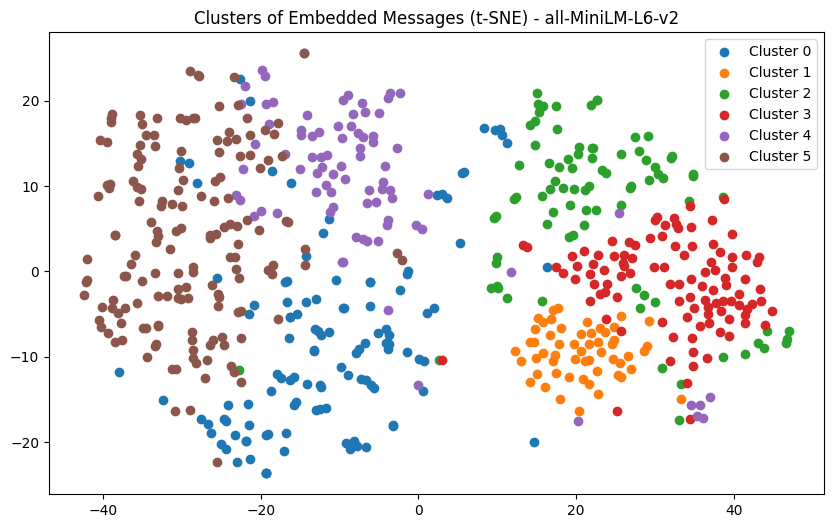

In [90]:
# Plot clusters for all-MiniLM-L6-v2
plt.figure(figsize=(10, 6))
for i in range(n_clusters):
    plt.scatter(embedded_tsne_miniLML6V[cluster_labels_miniLML6V == i, 0], embedded_tsne_miniLML6V[cluster_labels_miniLML6V == i, 1], label=f'Cluster {i}')
plt.title('Clusters of Embedded Messages (t-SNE) - all-MiniLM-L6-v2')
plt.legend()
plt.show()

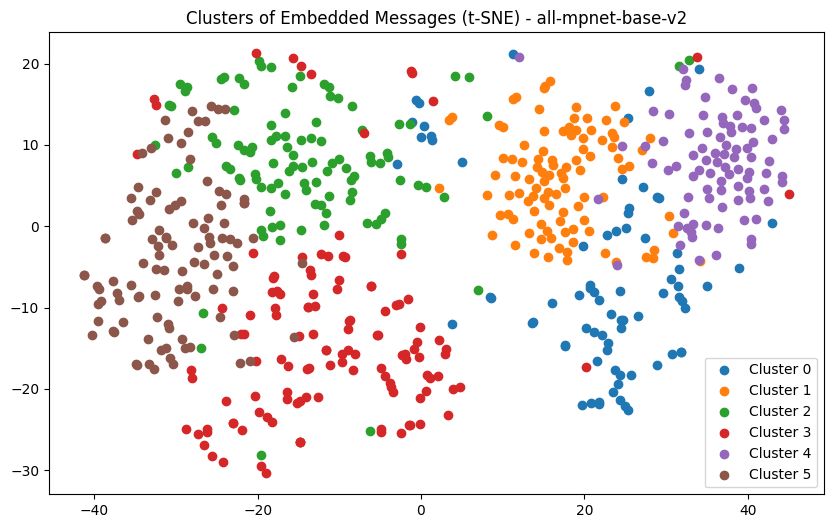

In [91]:
# Plot clusters for all-mpnet-base-v2  
plt.figure(figsize=(10, 6))
for i in range(n_clusters):
    plt.scatter(embedded_tsne_mpnetBaseV2[cluster_labels_mpnetBaseV2 == i, 0], embedded_tsne_mpnetBaseV2[cluster_labels_mpnetBaseV2 == i, 1], label=f'Cluster {i}')
plt.title('Clusters of Embedded Messages (t-SNE) - all-mpnet-base-v2')
plt.legend()
plt.show()

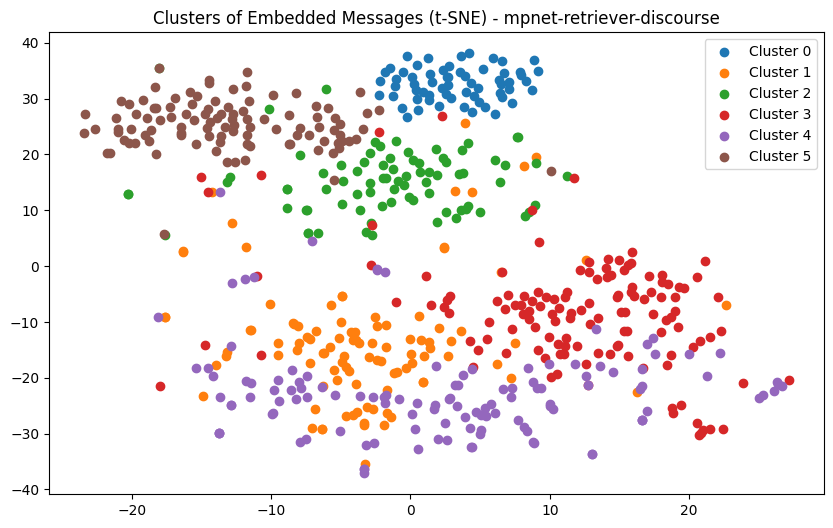

In [92]:
# Plot clusters for mpnet-retriever-discourse
plt.figure(figsize=(10, 6))
for i in range(n_clusters):
    plt.scatter(embedded_tsne_mpnetRetrieverDiscourse[cluster_labels_mpnetRetrieverDiscourse == i, 0], embedded_tsne_mpnetRetrieverDiscourse[cluster_labels_mpnetRetrieverDiscourse == i, 1], label=f'Cluster {i}')
plt.title('Clusters of Embedded Messages (t-SNE) - mpnet-retriever-discourse')
plt.legend()
plt.show()

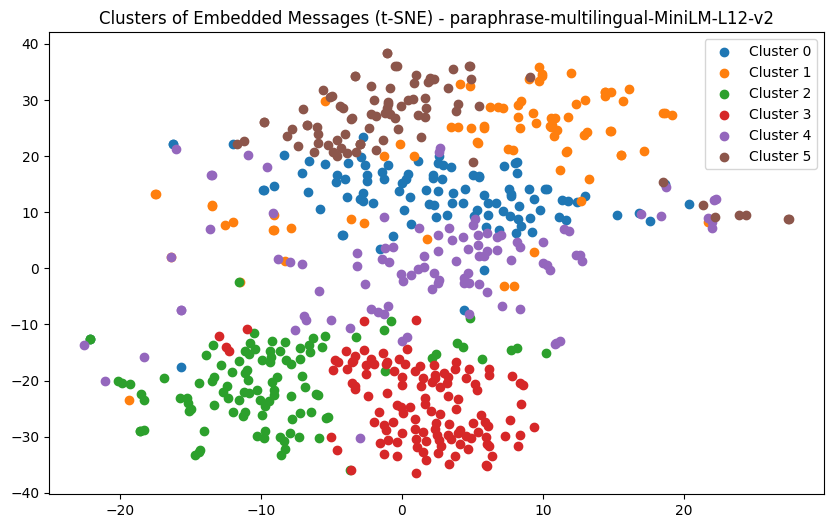

In [93]:
# Plot clusters for paraphrase-multilingual-MiniLM-L12-v2
plt.figure(figsize=(10, 6))
for i in range(n_clusters):
    plt.scatter(embedded_tsne_MiniLML12v2[cluster_labels_MiniLML12v2 == i, 0], embedded_tsne_MiniLML12v2[cluster_labels_MiniLML12v2 == i, 1], label=f'Cluster {i}')
plt.title('Clusters of Embedded Messages (t-SNE) - paraphrase-multilingual-MiniLM-L12-v2')
plt.legend()
plt.show()

In [94]:
# Output each cluster to a separate CSV file with the corresponding ground truth label for mpnet-retriever-discourse
for i in range(n_clusters):
    cluster_sentences = [data[j] for j in range(len(data)) if cluster_labels_mpnetRetrieverDiscourse[j] == i]
    cluster_ground_truth = [ground_truth[j] for j in range(len(data)) if cluster_labels_mpnetRetrieverDiscourse[j] == i]
    # output to a csv file
    df = pd.DataFrame(list(zip(cluster_sentences, cluster_ground_truth)), columns=["Message", "R2DiscussionType"])
    df.to_csv(f'./K_means/cluster_mpnetRetrieverDiscourse_{i}.csv', index=False)

for i in range(n_clusters):
    cluster_sentences = [data[j] for j in range(len(data)) if cluster_labels_miniLML6V[j] == i]
    cluster_ground_truth = [ground_truth[j] for j in range(len(data)) if cluster_labels_miniLML6V[j] == i]
    # output to a csv file
    df = pd.DataFrame(list(zip(cluster_sentences, cluster_ground_truth)), columns=["Message", "R2DiscussionType"])
    df.to_csv(f'./K_means/cluster_miniLML6V_{i}.csv', index=False)

for i in range(n_clusters):
    cluster_sentences = [data[j] for j in range(len(data)) if cluster_labels_mpnetBaseV2[j] == i]
    cluster_ground_truth = [ground_truth[j] for j in range(len(data)) if cluster_labels_mpnetBaseV2[j] == i]
    # output to a csv file
    df = pd.DataFrame(list(zip(cluster_sentences, cluster_ground_truth)), columns=["Message", "R2DiscussionType"])
    df.to_csv(f'./K_means/cluster_mpnetBaseV2_{i}.csv', index=False)

for i in range(n_clusters):
    cluster_sentences = [data[j] for j in range(len(data)) if cluster_labels_MiniLML12v2[j] == i]
    cluster_ground_truth = [ground_truth[j] for j in range(len(data)) if cluster_labels_MiniLML12v2[j] == i]
    # output to a csv file
    df = pd.DataFrame(list(zip(cluster_sentences, cluster_ground_truth)), columns=["Message", "R2DiscussionType"])
    df.to_csv(f'/K_means/cluster_MiniLML12v2_{i}.csv', index=False)

In [95]:
# clear the file
open('cluster_percentages.txt', 'w').close()

# calculate the percentage of each class in each cluster
for i in range(n_clusters):
    cluster_ground_truth = [ground_truth[j] for j in range(len(data)) if cluster_labels_mpnetRetrieverDiscourse[j] == i]
    cluster_classes = set(cluster_ground_truth)
    # output to a joint txt file for all clusters and models
    with open(f'./K_means/cluster_percentages.txt', 'a') as f:
        f.write(f'Cluster {i} - mpnet-retriever-discourse\n')
        for c in cluster_classes:
            f.write(f'{c}: {cluster_ground_truth.count(c)/len(cluster_ground_truth)*100:.2f}%\n')
        f.write('\n')
    
for i in range(n_clusters):
    cluster_ground_truth = [ground_truth[j] for j in range(len(data)) if cluster_labels_miniLML6V[j] == i]
    cluster_classes = set(cluster_ground_truth)
    # output to a joint txt file for all clusters and models
    with open(f':/K_means/cluster_percentages.txt', 'a') as f:
        f.write(f'Cluster {i} - all-MiniLM-L6-v2\n')
        for c in cluster_classes:
            f.write(f'{c}: {cluster_ground_truth.count(c)/len(cluster_ground_truth)*100:.2f}%\n')
        f.write('\n')

for i in range(n_clusters):
    cluster_ground_truth = [ground_truth[j] for j in range(len(data)) if cluster_labels_mpnetBaseV2[j] == i]
    cluster_classes = set(cluster_ground_truth)
    # output to a joint txt file for all clusters and models
    with open(f'./K_means/cluster_percentages.txt', 'a') as f:
        f.write(f'Cluster {i} - all-mpnet-base-v2\n')
        for c in cluster_classes:
            f.write(f'{c}: {cluster_ground_truth.count(c)/len(cluster_ground_truth)*100:.2f}%\n')
        f.write('\n')

for i in range(n_clusters):
    cluster_ground_truth = [ground_truth[j] for j in range(len(data)) if cluster_labels_MiniLML12v2[j] == i]
    cluster_classes = set(cluster_ground_truth)
    # output to a joint txt file for all clusters and models
    with open(f'./K_means/cluster_percentages.txt', 'a') as f:
        f.write(f'Cluster {i} - paraphrase-multilingual-MiniLM-L12-v2\n')
        for c in cluster_classes:
            f.write(f'{c}: {cluster_ground_truth.count(c)/len(cluster_ground_truth)*100:.2f}%\n')
        f.write('\n')